# Final Project Part 2 - Exploratory Data Analysis

## 1. Import Python Libraries

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
from datetime import datetime

%matplotlib inline

## 2. Load Data to DataFrame

In [119]:
ACLED = pd.read_csv('C:/Users/Ashley/Desktop/General_Assembly/final_project-master/ashley_suiter_final_project/data/MiddleEast_2016-2019_Apr20.csv', encoding='latin-1', low_memory=False)
ACLED.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,48,BHR323,323,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,NaN,Ad Diraz,26.218,50.471,1,Press TV,National,Small protest have been held in the village of...,0,1552577233
1,48,BHR324,324,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,NaN,Al Maamir,26.133,50.609,1,Press TV,National,Small protest have been held in the village of...,0,1552577233
2,48,BHR325,325,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,NaN,Nabih Sehla,26.183,50.585,1,Press TV,National,Small protest have been held in the village of...,0,1552577233
3,48,BHR327,327,01-January-2016,2016,1,Protests,Excessive force against protesters,Protesters (Bahrain),NaN,...,NaN,Abu Saybi,26.218,50.507,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1552577233
4,48,BHR328,328,01-January-2016,2016,1,Protests,Excessive force against protesters,Protesters (Bahrain),NaN,...,NaN,Ash Shakhurah,26.215,50.507,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1552577233


## 3. Exploring and Manipulating the Dataset

## 3.1 Understanding the size, structure and schema of the dataset

In [120]:
# View no of rows and columns
ACLED.shape

(133959, 29)

The dataset contains a total of **133,959 records** & **29 attributes**

In [121]:
#View row index
ACLED.index

RangeIndex(start=0, stop=133959, step=1)

The index is numeric from 0 to 1323958

In [122]:
# View a concise summary of data schema
ACLED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133959 entries, 0 to 133958
Data columns (total 29 columns):
ISO                 133959 non-null int64
EVENT_ID_CNTY       133959 non-null object
EVENT_ID_NO_CNTY    133959 non-null int64
EVENT_DATE          133959 non-null object
YEAR                133959 non-null int64
TIME_PRECISION      133959 non-null int64
EVENT_TYPE          133959 non-null object
SUB_EVENT_TYPE      133959 non-null object
ACTOR1              133959 non-null object
ASSOC_ACTOR_1       31399 non-null object
INTER1              133959 non-null int64
ACTOR2              86843 non-null object
ASSOC_ACTOR_2       15194 non-null object
INTER2              133959 non-null int64
INTERACTION         133959 non-null int64
REGION              133959 non-null object
COUNTRY             133959 non-null object
ADMIN1              133959 non-null object
ADMIN2              132427 non-null object
ADMIN3              61254 non-null object
LOCATION            133959 non-null obje

In [123]:
# View column names
ACLED.columns

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')

In [124]:
# View data types
ACLED.dtypes

ISO                   int64
EVENT_ID_CNTY        object
EVENT_ID_NO_CNTY      int64
EVENT_DATE           object
YEAR                  int64
TIME_PRECISION        int64
EVENT_TYPE           object
SUB_EVENT_TYPE       object
ACTOR1               object
ASSOC_ACTOR_1        object
INTER1                int64
ACTOR2               object
ASSOC_ACTOR_2        object
INTER2                int64
INTERACTION           int64
REGION               object
COUNTRY              object
ADMIN1               object
ADMIN2               object
ADMIN3               object
LOCATION             object
LATITUDE            float64
LONGITUDE           float64
GEO_PRECISION         int64
SOURCE               object
SOURCE_SCALE         object
NOTES                object
FATALITIES            int64
TIMESTAMP             int64
dtype: object

The dataset contains information about conflicts including type of conflict, location, and actor. Due to the fields of interest being non-numeric dummy transformation will need to be performed. Additionally, the DATE field is represented as an object and will need to be transformed into a a datetime object.

## 3.2 Understanding the data

### 3.2.1 General summary of the dataset

In [125]:
ACLED.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,48,BHR323,323,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,NaN,Ad Diraz,26.218,50.471,1,Press TV,National,Small protest have been held in the village of...,0,1552577233
1,48,BHR324,324,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,NaN,Al Maamir,26.133,50.609,1,Press TV,National,Small protest have been held in the village of...,0,1552577233
2,48,BHR325,325,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,NaN,Nabih Sehla,26.183,50.585,1,Press TV,National,Small protest have been held in the village of...,0,1552577233
3,48,BHR327,327,01-January-2016,2016,1,Protests,Excessive force against protesters,Protesters (Bahrain),NaN,...,NaN,Abu Saybi,26.218,50.507,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1552577233
4,48,BHR328,328,01-January-2016,2016,1,Protests,Excessive force against protesters,Protesters (Bahrain),NaN,...,NaN,Ash Shakhurah,26.215,50.507,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1552577233


In [126]:
ACLED.iloc[:,8:20].tail()

,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3
133954,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1,National Resistance Forces,Giants Brigade,3,13,Middle East,Yemen,Al Hudaydah,At Tuhayat,NaN
133955,National Resistance Forces,NaN,3,NaN,NaN,0,30,Middle East,Yemen,Al Hudaydah,Al Hali,NaN
133956,National Resistance Forces,NaN,3,Civilians (Yemen),NaN,7,37,Middle East,Yemen,Al Hudaydah,Hays,NaN
133957,National Resistance Forces,NaN,3,NaN,NaN,0,30,Middle East,Yemen,Al Hudaydah,At Tuhayat,NaN
133958,Military Forces of Yemen (2016-) Supreme Polit...,NaN,1,National Resistance Forces,Giants Brigade,3,13,Middle East,Yemen,Al Hudaydah,Ad Durayhimi,NaN


In [127]:
# checking for null data
ACLED.isnull().sum()

ISO                      0
EVENT_ID_CNTY            0
EVENT_ID_NO_CNTY         0
EVENT_DATE               0
YEAR                     0
TIME_PRECISION           0
EVENT_TYPE               0
SUB_EVENT_TYPE           0
ACTOR1                   0
ASSOC_ACTOR_1       102560
INTER1                   0
ACTOR2               47116
ASSOC_ACTOR_2       118765
INTER2                   0
INTERACTION              0
REGION                   0
COUNTRY                  0
ADMIN1                   0
ADMIN2                1532
ADMIN3               72705
LOCATION                 0
LATITUDE                 0
LONGITUDE                0
GEO_PRECISION            0
SOURCE                   0
SOURCE_SCALE             0
NOTES                    0
FATALITIES               0
TIMESTAMP                0
dtype: int64

**Null values** in the dataset are found in 5 fields (ASSOC_ACTOR_1, ASSOC_ACTOR_2, INTER2, ADMIN2, and ADMIN3.)  However. these fields will not be used for the preliminary analysis.

In [128]:
# View a concise summary of data for modelling - numeric variables
# This summary is not very useful because the variables are not relevent to the analysis
ACLED.describe()

,ISO,EVENT_ID_NO_CNTY,YEAR,TIME_PRECISION,INTER1,INTER2,INTERACTION,LATITUDE,LONGITUDE,GEO_PRECISION,FATALITIES,TIMESTAMP
count,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,133959.000000,1.339590e+05
mean,683.788510,18316.431087,2017.319904,1.045745,3.755910,2.180287,30.951157,29.720179,40.451882,1.393494,2.099583,1.552762e+09
std,207.941423,16689.127283,0.900319,0.225133,2.962781,2.593052,24.394068,8.815149,4.402622,0.568447,6.897289,6.003785e+05
min,48.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,10.000000,12.631000,26.306000,1.000000,0.000000,1.552576e+09
25%,682.000000,4261.000000,2017.000000,1.000000,1.000000,0.000000,12.000000,17.493000,36.620000,1.000000,0.000000,1.552577e+09
50%,760.000000,13833.000000,2017.000000,1.000000,2.000000,1.000000,18.000000,33.983000,40.727000,1.000000,0.000000,1.552577e+09
75%,792.000000,28099.000000,2018.000000,1.000000,8.000000,2.000000,38.000000,35.759000,43.783000,2.000000,1.000000,1.552577e+09
max,887.000000,471339.000000,2019.000000,3.000000,8.000000,8.000000,88.000000,42.027000,62.778000,3.000000,469.000000,1.555977e+09


In [129]:
# View a concise summary of data for modelling - non-numeric variables
ACLED.describe(include='object')

,EVENT_ID_CNTY,EVENT_DATE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,ACTOR2,ASSOC_ACTOR_2,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,SOURCE,SOURCE_SCALE,NOTES
count,133959,133959,133959,133959,133959,31399,86843,15194,133959,133959,133959,132427,61254,133959,133959,133959,133959
unique,133959,1206,7,25,677,1687,641,1367,1,15,216,1372,356,8729,5332,47,121085
top,SYR22954,07-September-2018,Explosions/Remote violence,Air/drone strike,Military Forces of Syria (2000-),Militia (Pro-Government),Civilians (Syria),Militia (Pro-Government),Middle East,Syria,Hama,Jebel Saman,Central,Mosul,SOHR,Other-Local,Coalition airstrikes hit unknown in Sirwah
freq,1,240,73916,34325,23979,4442,14083,2999,133959,57253,10949,3955,3481,1288,23580,50846,105


### 3.2.2 Unique Values and Summary Statistics

In [130]:
# Identify countries included in the dataset
ACLED['COUNTRY'].unique()

array(['Bahrain', 'Palestine', 'Iran', 'Iraq', 'Israel', 'Jordan',
       'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria',
       'United Arab Emirates', 'Turkey', 'Yemen'], dtype=object)

In [131]:
# Identify number of Unique Actors
len(ACLED['ACTOR1'].unique())

677

#### Encoding Actor Types
INTER1 and INTER2 records general type of Actors held in ACTOR1 and ACTOR2 fields. The INTER1 and INTER2 fields will be used for the model due to the large number of unique actors. 

Government or mutinous force = 1
Rebel force =2
Political militia= 3
Ethnic militia = 4
Rioters= 5
Protesters = 6
Civilians = 7
Outside/external force (e.g. UN) =8


In [132]:
#Create Dictionary of Actor Types
Actor_Type = {1: 'Government or munitous force', 2: 'Rebel force', 3: 'Political militia', 4:'Ethnic militia', 5:'Rioters', 6: 'Protesters', 7: 'Civilians', 8:'External forces'}
print(Actor_Type)

{1: 'Government or munitous force', 2: 'Rebel force', 3: 'Political militia', 4: 'Ethnic militia', 5: 'Rioters', 6: 'Protesters', 7: 'Civilians', 8: 'External forces'}


In [133]:
# Understand the average number of fatalites for an each ACTOR1 type 
inter1_fatal = ACLED.groupby('INTER1',as_index=False).agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')
inter1_fatal['INTER1']=inter1_fatal['INTER1'].map(Actor_Type)
inter1_fatal=inter1_fatal.set_index('INTER1')
print(inter1_fatal)

                              FATALITIES
INTER1                                  
Civilians                       0.000000
Protesters                      0.000519
Rioters                         0.054315
Political militia               1.355921
External forces                 1.481540
Ethnic militia                  2.494062
Government or munitous force    2.908208
Rebel force                     3.168635


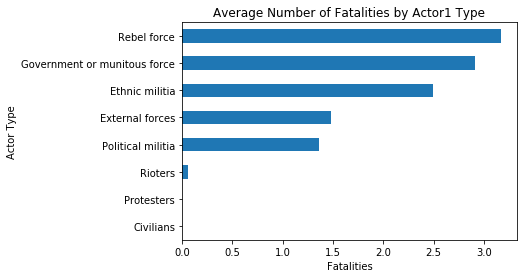

In [134]:
ax = inter1_fatal.loc[:,'FATALITIES'].plot(y='FATALITIES', x='INTER1', kind='barh',)
ax.set_title('Average Number of Fatalities by Actor1 Type')
ax.set_ylabel('Actor Type')
ax.set_xlabel('Fatalities');

In [135]:
# Understand the average number of fatalites for an each ACTOR2 type 
inter2_fatal=ACLED.groupby('INTER2',as_index=False).agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')
inter2_fatal['INTER2']=inter2_fatal['INTER2'].map(Actor_Type)
inter2_fatal=inter2_fatal.set_index('INTER2')
print(inter2_fatal)

                              FATALITIES
INTER2                                  
NaN                             0.014390
Rioters                         0.173779
Protesters                      0.233184
External forces                 2.049587
Civilians                       2.416185
Political militia               2.612293
Ethnic militia                  2.957565
Government or munitous force    3.408035
Rebel force                     4.169719


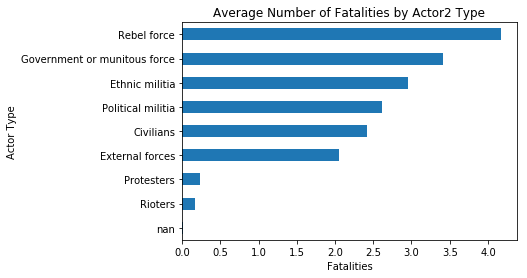

In [136]:
ax = inter2_fatal.loc[:,'FATALITIES'].plot(y='FATALITIES', x='INTER1', kind='barh',)
ax.set_title('Average Number of Fatalities by Actor2 Type')
ax.set_ylabel('Actor Type')
ax.set_xlabel('Fatalities');

It appears that Political Militia's and Rebel Forces are the most deadly actor types while actors such as the Outside Forces, Protesters, and Civilians are more peaceful/less deadly.

In [137]:
# Understand the average number of fatalites for an event type
ACLED.groupby('EVENT_TYPE').agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')

,FATALITIES
EVENT_TYPE,
Protests,0.005678
Riots,0.109294
Strategic developments,0.131747
Explosions/remote violence,0.909091
Explosions/Remote violence,1.583514
Violence against civilians,2.515413
Battles,4.642525


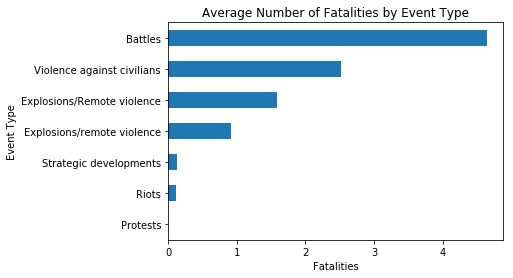

In [138]:
event_type = ACLED.groupby('EVENT_TYPE').agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')
ax = event_type.loc[:,'FATALITIES'].plot(y='FATALITIES', x='EVENT_TYPE', kind='barh',)
ax.set_title('Average Number of Fatalities by Event Type')
ax.set_ylabel('Event Type')
ax.set_xlabel('Fatalities');

Battles, Violence against civilians, and Explosions appear to be the most deadly. 

In [139]:
ACLED.groupby('SUB_EVENT_TYPE').agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')

,FATALITIES
SUB_EVENT_TYPE,
Abduction/forced disappearance,0.000000
Looting/property destruction,0.000000
Headquarters or base established,0.000000
Agreement,0.000000
Peaceful protest,0.000192
Protest with intervention,0.001523
Change to group/activity,0.006017
Non-violent transfer of territory,0.046382
Sexual violence,0.047619


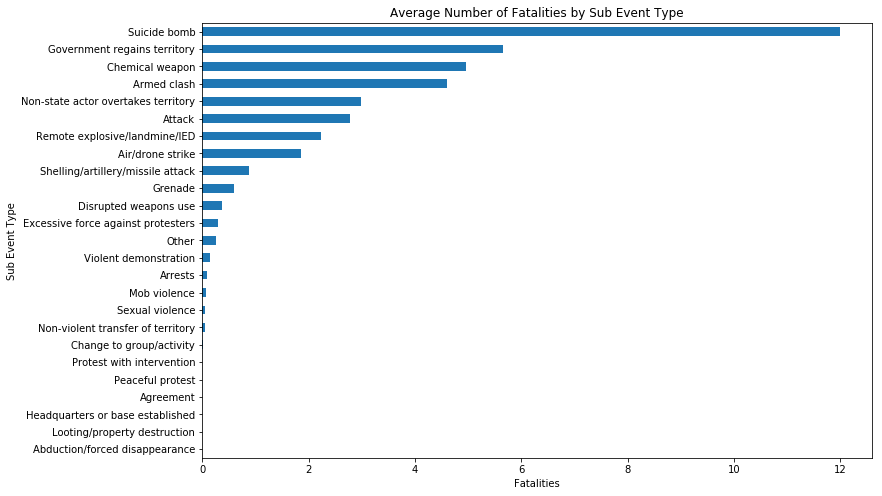

In [140]:
sub_event_type = ACLED.groupby('SUB_EVENT_TYPE').agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')
sub_event_type = ACLED.groupby('SUB_EVENT_TYPE').agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')
ax = sub_event_type.loc[:,'FATALITIES'].plot(figsize=(12,8), y='FATALITIES', x='SUB_EVENT_TYPE', kind='barh',)
ax.set_title('Average Number of Fatalities by Sub Event Type')
ax.set_ylabel('Sub Event Type')
ax.set_xlabel('Fatalities');

## 3.3 Manipulating the Dataset
Some data manipulations are required due to issues with datatype or text based fields requiring re-coding

In [141]:
# The above identified a typo in event type causing two separate categories for Explosions/Remote violence
# Use the replace function to correct this error
ACLED['EVENT_TYPE'] = ACLED['EVENT_TYPE'].replace("Explosions/remote violence","Explosions/Remote violence")

In [142]:
# Understand the average number of fatalites for an event type
ACLED.groupby('EVENT_TYPE').agg({'FATALITIES': 'mean'}).sort_values(by='FATALITIES')

,FATALITIES
EVENT_TYPE,
Protests,0.005678
Riots,0.109294
Strategic developments,0.131747
Explosions/Remote violence,1.583413
Violence against civilians,2.515413
Battles,4.642525


To perform the intended analysis the EVENT_DATE field will need to be transformed to a datetime datatype and be made the index 

In [143]:
# Format DATE field to a date datatype
ACLED['DATE'] = ACLED['EVENT_DATE'].apply(lambda x:datetime.strptime(x, '%d-%B-%Y'))

In [144]:
# Use DATE field to calculate the month and assign to MONTH column
ACLED['MONTH'] = ACLED['DATE'].apply(lambda x:x.month)

In [145]:
ACLED.groupby('MONTH').agg({'FATALITIES': ('sum','mean','median','std', 'max')})

FATALITIES                                
             sum      mean median       std  max
MONTH                                           
1          31661  2.044492      0  7.961639  469
2          24954  1.779505      0  5.917949  300
3          30768  2.100061      0  7.079468  230
4          28321  2.160259      0  6.765969  200
5          23388  2.497651      0  7.881241  250
6          22491  2.491249      0  7.692799  250
7          21812  1.980209      0  7.882511  300
8          20600  2.097973      0  6.344251  200
9          20663  2.069197      0  6.287385  234
10         19659  2.125068      0  6.282712  220
11         20921  2.346456      0  6.471308  180
12         16020  1.720730      0  4.979407  101

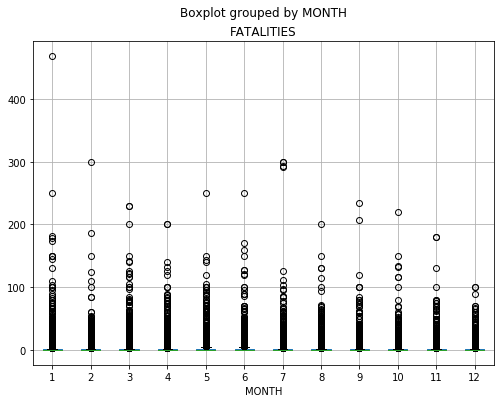

In [146]:
#month_summary['mean'].plot(by="MONTH")
ax = ACLED.boxplot(column='FATALITIES', by='MONTH', figsize=(8, 6))

In [147]:
# Use DATE field to calculate Day of the Week (DOW) and assign to DOW column
ACLED['DOW'] = ACLED['DATE'].apply(lambda x:x.weekday_name)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [148]:
ACLED.groupby('DOW',as_index=False).agg({'FATALITIES': ('sum','min', 'mean','median','std', 'max')})

DOW FATALITIES                                    
                    sum min      mean median       std  max
0     Friday      36137   0  1.934218      0  6.831150  300
1     Monday      42221   0  2.117508      0  6.242643  200
2   Saturday      40912   0  2.180113      0  6.977392  293
3     Sunday      42311   0  2.195921      0  7.292748  300
4   Thursday      37934   0  2.099978      0  6.519279  230
5    Tuesday      41070   0  2.063715      0  7.425669  469
6  Wednesday      40673   0  2.103268      0  6.897077  250

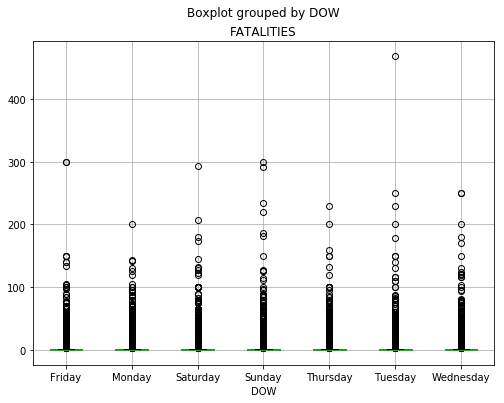

In [149]:
ax = ACLED.boxplot(column='FATALITIES', by='DOW', figsize=(8, 6))

In [150]:
# Determine Season based on Month and assign to SEASON column
def set_season(row):
    if row == 12 or row <= 2:
        return 'Winter'
    elif row >= 3 and row <= 5:
        return 'Spring'
    elif row >= 6 and row <= 8:
        return 'Summer'
    else:
        return 'Autumn'
    
ACLED['SEASON'] = ACLED['MONTH'].apply(set_season)


In [151]:
ACLED.groupby('SEASON',as_index=False).agg({'FATALITIES': ('sum','mean','median','std', 'max')})

SEASON FATALITIES                                
                 sum      mean median       std  max
0  Autumn      61243  2.175363      0  6.345574  234
1  Spring      82477  2.221603      0  7.185758  250
2  Summer      64903  2.173431      0  7.354411  300
3  Winter      72635  1.871120      0  6.625968  469

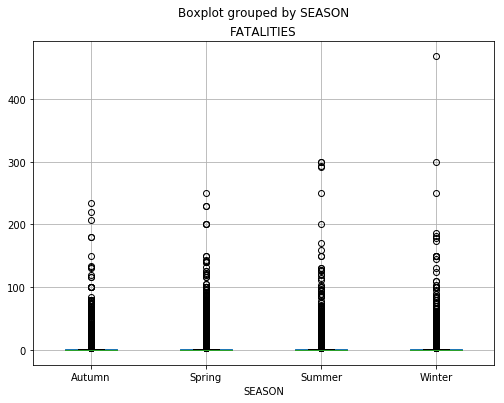

In [152]:
ax = ACLED.boxplot(column='FATALITIES', by='SEASON', figsize=(8, 6))

In [153]:
ACLED.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,DATE,MONTH,DOW,SEASON
0,48,BHR323,323,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,1,Press TV,National,Small protest have been held in the village of...,0,1552577233,2016-01-01,1,Friday,Winter
1,48,BHR324,324,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,1,Press TV,National,Small protest have been held in the village of...,0,1552577233,2016-01-01,1,Friday,Winter
2,48,BHR325,325,01-January-2016,2016,1,Protests,Peaceful protest,Protesters (Bahrain),NaN,...,1,Press TV,National,Small protest have been held in the village of...,0,1552577233,2016-01-01,1,Friday,Winter
3,48,BHR327,327,01-January-2016,2016,1,Protests,Excessive force against protesters,Protesters (Bahrain),NaN,...,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1552577233,2016-01-01,1,Friday,Winter
4,48,BHR328,328,01-January-2016,2016,1,Protests,Excessive force against protesters,Protesters (Bahrain),NaN,...,1,Middle East Eye,International,Bahrainis took part in an anti-regime protest ...,0,1552577233,2016-01-01,1,Friday,Winter


In [154]:
col_of_interest = ['COUNTRY', 'LOCATION','EVENT_TYPE', 'SUB_EVENT_TYPE', 'INTER1', 'INTER2', 'DATE', 'YEAR', 'SEASON','MONTH', 'DOW', 'FATALITIES']
sub_acled = ACLED.loc[:,col_of_interest]

In [155]:
sub_acled.head()

,COUNTRY,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,INTER1,INTER2,DATE,YEAR,SEASON,MONTH,DOW,FATALITIES
0,Bahrain,Ad Diraz,Protests,Peaceful protest,6,0,2016-01-01,2016,Winter,1,Friday,0
1,Bahrain,Al Maamir,Protests,Peaceful protest,6,0,2016-01-01,2016,Winter,1,Friday,0
2,Bahrain,Nabih Sehla,Protests,Peaceful protest,6,0,2016-01-01,2016,Winter,1,Friday,0
3,Bahrain,Abu Saybi,Protests,Excessive force against protesters,6,1,2016-01-01,2016,Winter,1,Friday,0
4,Bahrain,Ash Shakhurah,Protests,Excessive force against protesters,6,1,2016-01-01,2016,Winter,1,Friday,0


In [156]:
# Dummy-code columns of interest
sub_acled = pd.get_dummies(sub_acled, columns=['COUNTRY', 'SUB_EVENT_TYPE', 'EVENT_TYPE',  'INTER1', 'INTER2', 'YEAR', 'SEASON','MONTH', 'DOW'])
sub_acled.head()

,LOCATION,DATE,FATALITIES,COUNTRY_Bahrain,COUNTRY_Iran,COUNTRY_Iraq,COUNTRY_Israel,COUNTRY_Jordan,COUNTRY_Kuwait,COUNTRY_Lebanon,...,MONTH_10,MONTH_11,MONTH_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
0,Ad Diraz,2016-01-01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Al Maamir,2016-01-01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Nabih Sehla,2016-01-01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Abu Saybi,2016-01-01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Ash Shakhurah,2016-01-01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### 3.1.2 Analysing numerical variables

In [157]:
# Get the correlation of all variables
sub_acled.corr()

,FATALITIES,COUNTRY_Bahrain,COUNTRY_Iran,COUNTRY_Iraq,COUNTRY_Israel,COUNTRY_Jordan,COUNTRY_Kuwait,COUNTRY_Lebanon,COUNTRY_Oman,COUNTRY_Palestine,...,MONTH_10,MONTH_11,MONTH_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
FATALITIES,1.000000,-0.031946,-0.049559,0.167443,-0.028007,-0.013577,-0.004075,-0.018932,-0.002201,-0.058382,...,0.001006,0.009558,-0.015011,-0.009652,0.001087,0.004713,0.005725,0.000023,-0.002172,0.000219
COUNTRY_Bahrain,-0.031946,1.000000,-0.018539,-0.044114,-0.009879,-0.005508,-0.001414,-0.009499,-0.000764,-0.021573,...,-0.002856,0.013345,0.005678,0.053353,-0.009462,-0.013006,-0.013992,0.000117,-0.010590,-0.005591
COUNTRY_Iran,-0.049559,-0.018539,1.000000,-0.073258,-0.016406,-0.009146,-0.002349,-0.015774,-0.001268,-0.035825,...,0.009460,0.002939,0.022235,-0.037725,0.017677,0.000064,0.016310,-0.010852,0.015365,-0.002068
COUNTRY_Iraq,0.167443,-0.044114,-0.073258,1.000000,-0.039038,-0.021763,-0.005589,-0.037535,-0.003018,-0.085246,...,0.012237,0.024808,0.009992,-0.023293,0.003789,0.000264,0.011239,0.005014,-0.000302,0.003074
COUNTRY_Israel,-0.028007,-0.009879,-0.016406,-0.039038,1.000000,-0.004874,-0.001252,-0.008406,-0.000676,-0.019091,...,0.006296,0.010574,0.009916,-0.010443,0.003664,0.006348,-0.000916,-0.003197,0.008496,-0.004262
COUNTRY_Jordan,-0.013577,-0.005508,-0.009146,-0.021763,-0.004874,1.000000,-0.000698,-0.004686,-0.000377,-0.010643,...,-0.006268,-0.004701,0.011165,0.012590,-0.005257,-0.002421,-0.007043,0.007168,0.000029,-0.004659
COUNTRY_Kuwait,-0.004075,-0.001414,-0.002349,-0.005589,-0.001252,-0.000698,1.000000,-0.001203,-0.000097,-0.002733,...,-0.001446,-0.001337,0.000728,-0.003779,0.002237,-0.000582,0.004050,-0.000386,0.000681,-0.002324
COUNTRY_Lebanon,-0.018932,-0.009499,-0.015774,-0.037535,-0.008406,-0.004686,-0.001203,1.000000,-0.000650,-0.018356,...,-0.005008,-0.009565,-0.000211,0.000534,-0.002083,-0.003486,0.000601,0.003964,-0.000130,0.000705
COUNTRY_Oman,-0.002201,-0.000764,-0.001268,-0.003018,-0.000676,-0.000377,-0.000097,-0.000650,1.000000,-0.001476,...,0.002104,-0.001930,-0.001976,-0.002910,0.002780,-0.002918,0.002923,-0.002854,0.005691,-0.002969
COUNTRY_Palestine,-0.058382,-0.021573,-0.035825,-0.085246,-0.019091,-0.010643,-0.002733,-0.018356,-0.001476,1.000000,...,0.001769,-0.010973,0.025373,0.058300,-0.006522,-0.023484,-0.012817,-0.007238,-0.004330,-0.003457


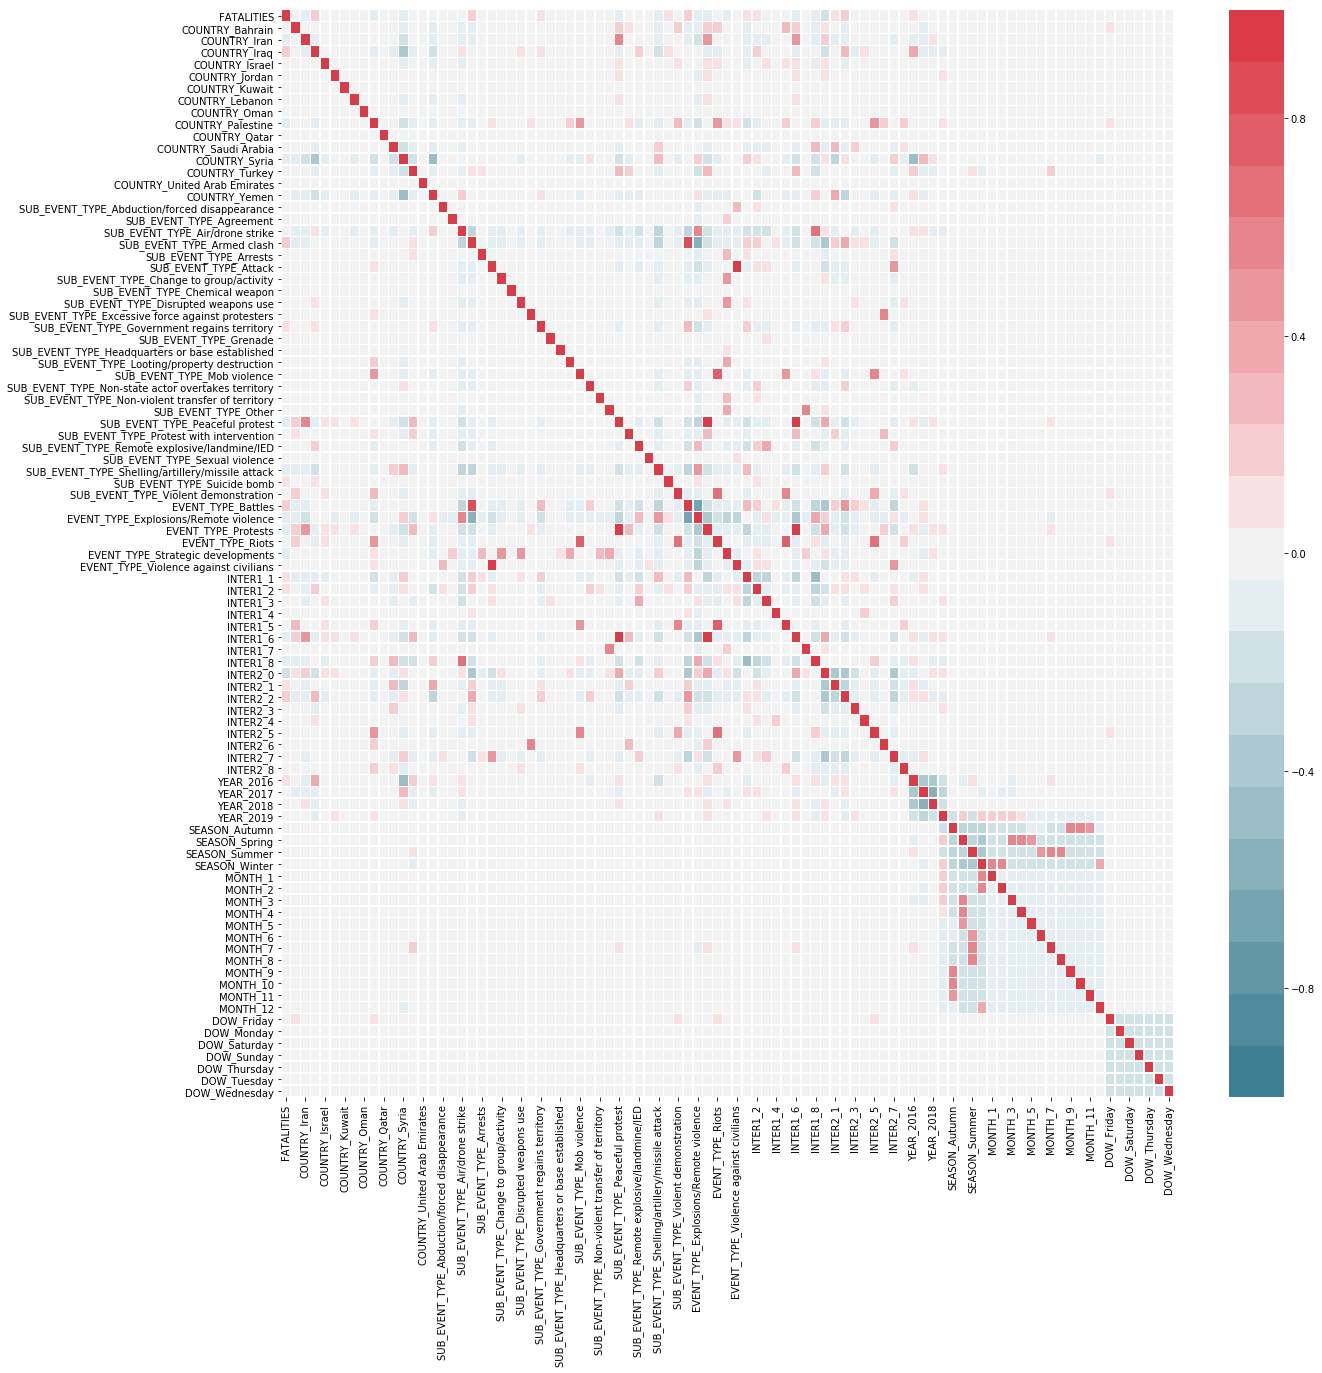

In [158]:
# Heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(sub_acled.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

The above shows expected correlations between similar fields, i.e. event types and subevent types, Months correlating to other months, etc.  There does not appear to be a strong correlation between fatalities and the other variables, with the exception of YEAR_2016. But, there does appear to be some moderate correlation between certain months or years and particular event types as well as certain countries and the type of actors or event types. 

# 4. First Pass Model


In [159]:
# import relevant modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#set feature cols as all columns of sub_acled except LOCATION DATE and FATALITIES
feature_cols = sub_acled.drop(['LOCATION', 'FATALITIES', 'DATE'], axis =1).columns

X = sub_acled.loc[:, feature_cols]
y = sub_acled.loc[:, 'FATALITIES']

In [160]:
#Perform train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [161]:
# run preliminary model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
# asses model score
linreg.score(X_test, y_test)

0.0908973793446124

This initial model only explains 9% of the variation in the dataset.  To try to create a better model the data was aggregated by week and a new linear model was created without Season, Day, Month information.

In [163]:
# resample data to aggregate in 1 Week increments
feature_cols =  sub_acled.drop(['LOCATION', 'FATALITIES', 'DATE','YEAR_2016', 'YEAR_2017', \
       'YEAR_2018', 'YEAR_2019', 'SEASON_Autumn', 'SEASON_Spring',\
       'SEASON_Summer', 'SEASON_Winter', 'MONTH_1', 'MONTH_2', 'MONTH_3',\
       'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9',\
       'MONTH_10', 'MONTH_11', 'MONTH_12', 'DOW_Friday', 'DOW_Monday',\
       'DOW_Saturday', 'DOW_Sunday', 'DOW_Thursday', 'DOW_Tuesday', 'DOW_Wednesday'], axis =1).columns
sub_acled.set_index('DATE', inplace=True)
sub_acled_resample = sub_acled.resample('1W').sum()

In [164]:
sub_acled_resample.head()

,FATALITIES,COUNTRY_Bahrain,COUNTRY_Iran,COUNTRY_Iraq,COUNTRY_Israel,COUNTRY_Jordan,COUNTRY_Kuwait,COUNTRY_Lebanon,COUNTRY_Oman,COUNTRY_Palestine,...,MONTH_10,MONTH_11,MONTH_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-03,754,18.0,7.0,76.0,2.0,0.0,0.0,4.0,0.0,15.0,...,0.0,0.0,0.0,80.0,0.0,85.0,77.0,0.0,0.0,0.0
2016-01-10,2147,11.0,12.0,181.0,5.0,0.0,1.0,19.0,0.0,31.0,...,0.0,0.0,0.0,83.0,86.0,69.0,77.0,76.0,89.0,78.0
2016-01-17,1798,4.0,9.0,196.0,3.0,1.0,0.0,18.0,0.0,33.0,...,0.0,0.0,0.0,89.0,91.0,77.0,72.0,77.0,79.0,82.0
2016-01-24,1071,4.0,3.0,161.0,1.0,3.0,0.0,7.0,0.0,29.0,...,0.0,0.0,0.0,55.0,84.0,64.0,64.0,78.0,76.0,67.0
2016-01-31,1409,6.0,14.0,162.0,2.0,1.0,0.0,17.0,0.0,17.0,...,0.0,0.0,0.0,76.0,74.0,66.0,68.0,48.0,69.0,79.0


In [165]:
X = sub_acled_resample.loc[:, feature_cols]
y = sub_acled_resample.loc[:, 'FATALITIES']
#Perform train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
# run preliminary model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# asses model score
linreg.score(X_test, y_test)

0.5282414935692922

This model was a significant improvement over the initial model, explaining 52% of the variation in the dataset compared to 9%.  Future iterations will further explor relevant fields and the utility the date season information, as well as the use of a timeshift for predicting future violence. 

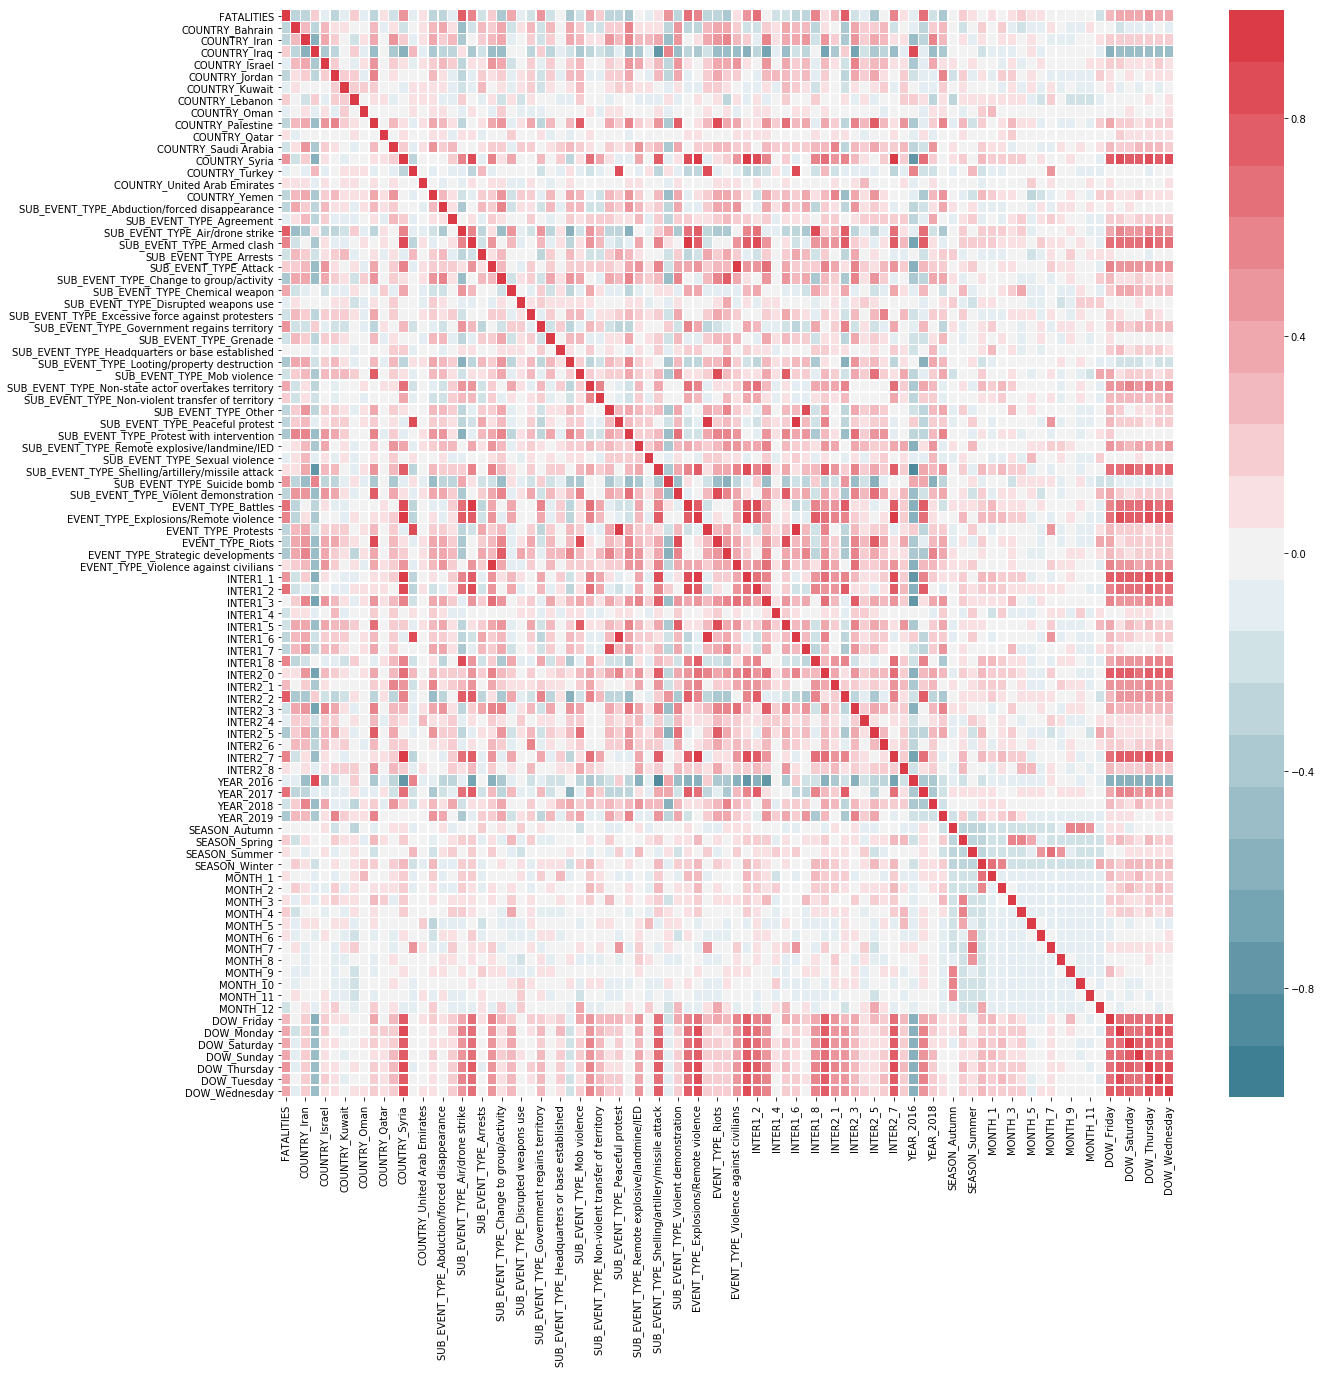

In [166]:
# Heatmap of resampled dataset correlation matrix
fig, ax = plt.subplots(figsize=(20,20))         
sns.heatmap(sub_acled_resample.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

The resampled dataset appears to have much higher correlation to Fatalities. With the exception being the month variables.

# 4. Summary

 - The inital dataset has **133959** rows with **29 attributes**.
 - The dataset is primarily **non-numerical** feature variables. 
 - The non-numerical feature variables were reclassified and transformed into dummy variabeles for use in the planned prediction model.
 - The columns of interest **do not contain null values**.
 - **Aggregating data by week appeared to create a much stronger model**. However, the resulting model does not tell us **where** violence may occur. 
 


# 5. Conclusion 

Additional data manipulation will need to occur to create a useful model of reasonable predictive strength. Specifically, aggregation will need to occur in a manner that also allows the model to account for country in which events occur. 
Then, date/season variables will be re-calculated based on the Date Index and, a timeshift will need to be performed to assess if previous events are predictive of future events. 